In [4]:
import json
import glob
import os
#C:\Users\since\Dropbox\RAs\projects\SangJun\annotation
SG_dir = '/mnt/c/Users/since/Dropbox/RAs/projects/SangJun'
recall_dir = '/mnt/c/Users/since/Dropbox/RAs/projects/SangJun/hm_segmented'

In [6]:
#ref_dir = glob.glob(os.path.join(annot_dir, 'reference.json')
with open("reference.json", "r") as f:
    annot = json.load(f)
    #print(running_man)
annotations = {"RunningMan" : annot['RunningMan'], "Dream":annot['Dream'] }
files = glob.glob(os.path.join(recall_dir,'event_seg', '*.json'))
programs = ["RunningMan", "Dream"]

In [ ]:
#불용어 제거
from konlpy.tag import Okt
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)


# BERTScore

In [33]:
from torchmetrics.text.bert import BERTScore

metric = BERTScore("klue/roberta-base")

ImportError: cannot import name 'Literal' from 'typing' (/home/sincerely/.conda/envs/nlp/lib/python3.7/typing.py)

In [ ]:
from itertools import product

os.makedirs("matrices", exist_ok=True)

for fn in sorted(files):
    with open(fn, "r") as f:
        data = json.load(f)

    user_result = {}
    for program in programs:
        result = {"references": annotations[program]}
        for recall in ["Recall1", "Recall2"]:
            inputs = list(product(annotations[program], data[recall][program]))
            targets, preds = list(zip(*inputs))

            scores = metric(preds, targets)
            matrix = scores["f1"].view(len(annotations[program]), -1)
            
            result[recall] = data[recall][program]
            result[f"{recall}-Matrix"] = matrix.tolist()
        user_result[program] = result
    
    with open(f"matrices/{os.path.basename(fn)}", "w") as f:
        json.dump(user_result, f, indent=2, ensure_ascii=False)

# BLEU

In [2]:
from konlpy.tag import Mecab

mecab = Mecab()

## Compare recall1 and recall2

### Codes

In [22]:
from nltk.translate.bleu_score import sentence_bleu
from itertools import product

os.makedirs("matrices", exist_ok=True)

results = {} 
for fn in sorted(files):
    with open(fn, "r") as f:
        data = json.load(f)
        filename = os.path.basename(fn).split(".")[0]

    user_result = {}
    for program in programs:
        result = {"references": annotations[program]}
        inputs = list(product(data["Recall1"][program], data["Recall2"][program]))
        targets, preds = list(zip(*inputs))

        scores = [ sentence_bleu([mecab.morphs(t)], mecab.morphs(p)) for t, p in zip(targets, preds) ]
        chunk_size = len(data[recall][program])
        matrix = [ scores[i:i+chunk_size] for i in range(0, len(scores), chunk_size)]

        result[recall] = data[recall][program]
        result[f"{recall}-Matrix"] = matrix
            
        user_result[program] = matrix
    results[int(filename[1:])]= user_result
    
    # with open(f"matrices/{os.path.basename(fn)}", "w") as f:
    #     json.dump(user_result, f, indent=2, ensure_ascii=False)

In [22]:
from nltk.translate.bleu_score import sentence_bleu
from itertools import product

os.makedirs("matrices", exist_ok=True)

results = {} 
for fn in sorted(files):
    with open(fn, "r") as f:
        data = json.load(f)
        filename = os.path.basename(fn).split(".")[0]

    user_result = {}
    for program in programs:
        result = {"references": annotations[program]}
        inputs = list(product(data["Recall1"][program], data["Recall2"][program]))
        targets, preds = list(zip(*inputs))

        scores = [ sentence_bleu([mecab.morphs(t)], mecab.morphs(p)) for t, p in zip(targets, preds) ]
        chunk_size = len(data[recall][program])
        matrix = [ scores[i:i+chunk_size] for i in range(0, len(scores), chunk_size)]

        result[recall] = data[recall][program]
        result[f"{recall}-Matrix"] = matrix
            
        user_result[program] = matrix
    results[int(filename[1:])]= user_result
    
    # with open(f"matrices/{os.path.basename(fn)}", "w") as f:
    #     json.dump(user_result, f, indent=2, ensure_ascii=False)

In [47]:
blue_run = np.array([results[key]["RunningMan"] for key in results.keys()])
blue_run_mean = blue_run.mean(axis = 0)

blue_Dre = np.array([results[key]["Dream"] for key in results.keys()])
blue_Dre_mean = blue_Dre.mean(axis = 0)

### plot results

Text(816.0353535353534, 0.5, 'Recall2 Sentence')

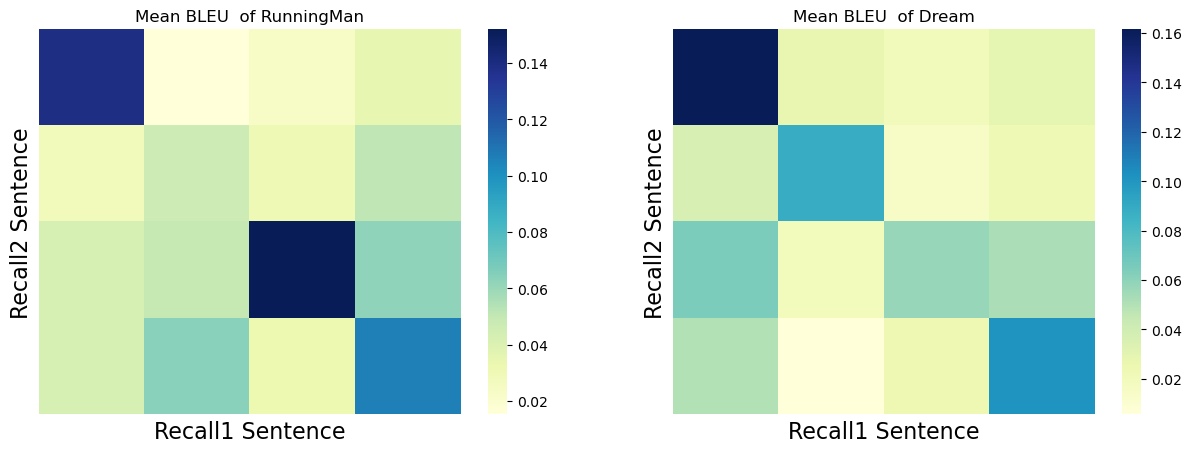

In [63]:
#plot 
import seaborn as sns
import matplotlib.pyplot as plt

#fig = plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), gridspec_kw=dict(width_ratios=[10,10]))

sns.heatmap(blue_run_mean, cmap="YlGnBu",ax=axs[0], xticklabels=False, yticklabels=False,)
sns.heatmap(blue_Dre_mean, cmap="YlGnBu", ax=axs[1],xticklabels=False, yticklabels=False,)

axs[0].set_title(f"Mean BLEU  of RunningMan")
axs[1].set_title(f"Mean BLEU  of Dream")
axs[0].set_xlabel("Recall1 Sentence", fontsize=16)
axs[1].set_xlabel("Recall1 Sentence", fontsize=16)
axs[0].set_ylabel("Recall2 Sentence", fontsize=16)
axs[1].set_ylabel("Recall2 Sentence", fontsize=16)

## Compare Chunked Annotation and Recall data 
- for this i need to make a chunked annotations

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from itertools import product

#os.makedirs("matrices", exist_ok=True)

results = {} 
for fn in sorted(files):
    with open(fn, "r") as f:
        data = json.load(f)
        filename = os.path.basename(fn).split(".")[0]

    user_result = {}
    for program in programs:
        result = {"references": annotations[program]}
        inputs = list(product(annotations[program], data["Recall2"][program]))
        targets, preds = list(zip(*inputs))

        scores = [ sentence_bleu([mecab.morphs(t)], mecab.morphs(p)) for t, p in zip(targets, preds) ]
        chunk_size = len(data[recall][program])
        matrix = [ scores[i:i+chunk_size] for i in range(0, len(scores), chunk_size)]

        result[recall] = data[recall][program]
        result[f"{recall}-Matrix"] = matrix
            
        user_result[program] = matrix
    results[int(filename[1:])]= user_result
    
    # with open(f"matrices/{os.path.basename(fn)}", "w") as f:
    #     json.dump(user_result, f, indent=2, ensure_ascii=False)

# STS

In [28]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

## Compare Recall1 and Recall2

In [69]:
from itertools import product
import numpy as np

output_dir = os.path.join(SG_dir, "Matrix", "hm_seg")

os.makedirs(output_dir, exist_ok=True)

users_results = {} 
for fn in sorted(files):
    with open(fn, "r") as f:
        data = json.load(f)
        filename = os.path.basename(fn).split(".")[0]
    self_user_result = {}
    for program in programs:
        result = {"references": annotations[program]}
        reference_embeddings = model.encode(data["Recall1"][program])
        recall_embeddings = model.encode(data["Recall2"][program])
        
        reference_embeddings /= np.linalg.norm(reference_embeddings, axis=-1, ord=2, keepdims=True)
        recall_embeddings /= np.linalg.norm(recall_embeddings, axis=-1, ord=2, keepdims=True)

        matrix = reference_embeddings @ recall_embeddings.T
        self_user_result[program] = matrix.tolist()
    users_results[int(filename[1:])] = self_user_result
    # with open(os.path.join(output_dir, os.path.basename(fn)), "w") as f:
    #     json.dump(user_result, f, indent=2, ensure_ascii=False)

In [77]:
STS_run = np.array([users_results[key]["RunningMan"] for key in users_results.keys()])
STS_run_mean = blue_run.mean(axis = 0)

STS_Dre = np.array([users_results[key]["Dream"] for key in users_results.keys()])
STS_Dre_mean = blue_Dre.mean(axis = 0)

Text(816.0353535353534, 0.5, 'Recall2 Sentence')

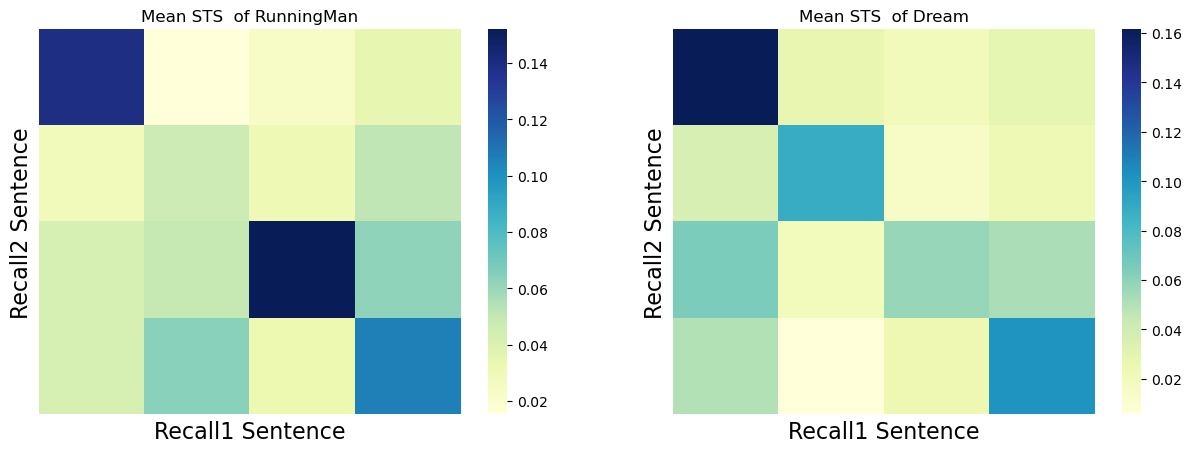

In [78]:
#plot 
import seaborn as sns
import matplotlib.pyplot as plt

#fig = plt.figure()
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), gridspec_kw=dict(width_ratios=[10,10]))

sns.heatmap(STS_run_mean, cmap="YlGnBu",ax=axs[0], xticklabels=False, yticklabels=False,)
sns.heatmap(STS_Dre_mean, cmap="YlGnBu", ax=axs[1],xticklabels=False, yticklabels=False,)

axs[0].set_title(f"Mean STS  of RunningMan")
axs[1].set_title(f"Mean STS  of Dream")
axs[0].set_xlabel("Recall1 Sentence", fontsize=16)
axs[1].set_xlabel("Recall1 Sentence", fontsize=16)
axs[0].set_ylabel("Recall2 Sentence", fontsize=16)
axs[1].set_ylabel("Recall2 Sentence", fontsize=16)

## Compare annotations and recall data

In [80]:
from itertools import product
import numpy as np

output_dir = os.path.join(SG_dir, "Matrix", "hm_seg")

os.makedirs(output_dir, exist_ok=True)

for fn in sorted(files):
    with open(fn, "r") as f:
        data = json.load(f)

    user_result = {}
    for program in programs:
        result = {"references": annotations[program]}
        reference_embeddings = model.encode(annotations[program])

        for recall in ["Recall1", "Recall2"]:
            recall_embeddings = model.encode(data[recall][program])

            reference_embeddings /= np.linalg.norm(reference_embeddings, axis=-1, ord=2, keepdims=True)
            recall_embeddings /= np.linalg.norm(recall_embeddings, axis=-1, ord=2, keepdims=True)

            matrix = reference_embeddings @ recall_embeddings.T
            
            result[recall] = data[recall][program]
            result[f"{recall}-Matrix"] = matrix.tolist()
            print
        user_result[program] = result
    
    # with open(os.path.join(output_dir, os.path.basename(fn)), "w") as f:
    #     json.dump(user_result, f, indent=2, ensure_ascii=False)

In [81]:
import json
import csv
import os, glob
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix_files = sorted(glob.glob( os.path.join(SG_dir, "Matrix", "hm_seg", "*.json")))
csv_dir = os.path.join(output_dir,"csvs")
xlsx_dir = os.path.join(output_dir,"xlsx")
plots_dir = os.path.join(output_dir,"plots")
rank_plots_dir = os.path.join(output_dir,"rank_plots")

os.makedirs(csv_dir, exist_ok=True)
os.makedirs(xlsx_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(rank_plots_dir, exist_ok=True)

In [82]:
matrix_df = {} 
for file in tqdm(matrix_files):
    with open(file, "r") as f:
        data = json.load(f)
        filename = os.path.basename(file).split(".")[0]
    matrix_stor_df = {} 
    for program in programs:
        dfs, half_matrix_df = {}, {}
        for recall in ["Recall1", "Recall2"]:
            header = [""] + data[program][recall]

            # Write to CSV
            output_path = f"{csv_dir}/{filename}-{program}-{recall}.csv"
            with open(output_path, "w") as f:
                writer = csv.writer(f)
                writer.writerow(header)

                for refer, numbers in zip(
                    data[program]["references"], data[program][recall + "-Matrix"]
                ):
                    numbers = [round(x, 4) for x in numbers]
                    writer.writerow([refer] + numbers)
            dfs[recall] = pd.read_csv(output_path)

            # Save data heatmap plot
            matrix = dfs[recall].iloc[:, 1:].to_numpy()
            # rank = matrix.argsort(axis=0).argsort(axis=0)
            # rank[rank > 3] = 3
            # rank = (3 - rank) / 3
            
            fig = plt.figure(figsize=(10, 10))
            sns.heatmap(
                matrix,
                cmap="YlGnBu",
                xticklabels=False,
                yticklabels=False,
            )
            plt.title(f"{filename}-{program}-{recall}")
            plt.xlabel("Recall Sentences", fontsize=16)
            plt.ylabel("Reference Annotation Sentences", fontsize=16)
            plt.savefig(f"{plots_dir}/{program}/{filename}-{program}-{recall}.png")
            plt.close(fig)
            half_matrix_df[recall] = matrix
        matrix_stor_df[program]=half_matrix_df
    matrix_df[int(filename[1:])] = matrix_stor_df
   

100%|███████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.62it/s]


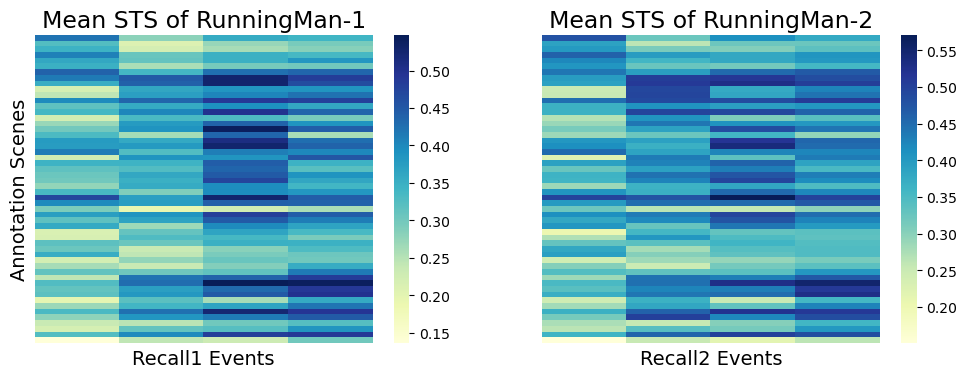

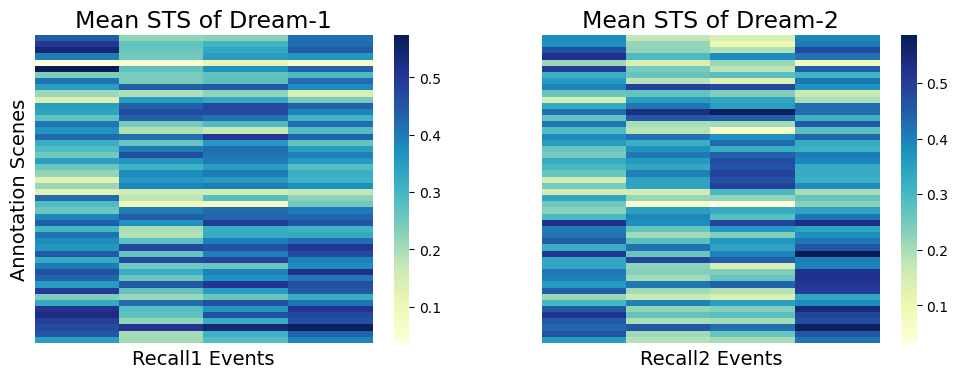

In [93]:
story_df = {} 
for program in programs:
    temp1 = np.array([matrix_df[key][program]["Recall1"] for key in matrix_df.keys()])
    temp2 = np.array([matrix_df[key][program]["Recall2"] for key in matrix_df.keys()])
    temp1_mean = temp1.mean(axis = 0)
    temp2_mean = temp2.mean(axis = 0)
    

    #plot 
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[10,10]))

    sns.heatmap(temp1_mean, cmap="YlGnBu",ax=axs[0], xticklabels=False, yticklabels=False,)
    sns.heatmap(temp2_mean, cmap="YlGnBu", ax=axs[1],xticklabels=False, yticklabels=False,)

    axs[0].set_title(f"Mean STS of {program}-1", fontsize=17)
    axs[1].set_title(f"Mean STS of {program}-2", fontsize=17)
    axs[0].set_xlabel("Recall1 Events", fontsize=14)
    axs[1].set_xlabel("Recall2 Events", fontsize=14)
    axs[0].set_ylabel("Annotation Scenes", fontsize=14)


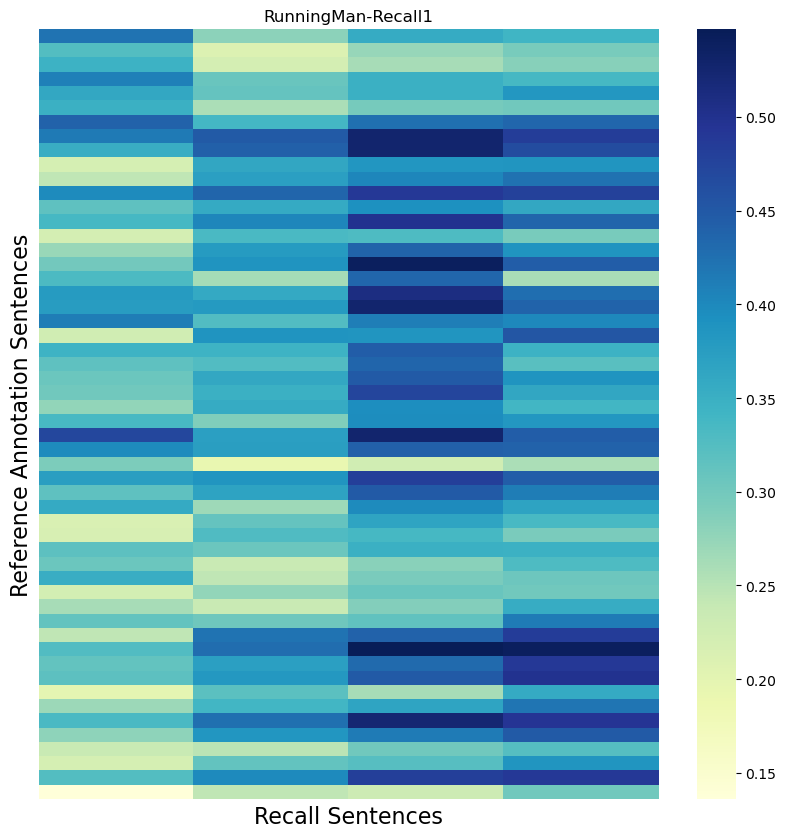

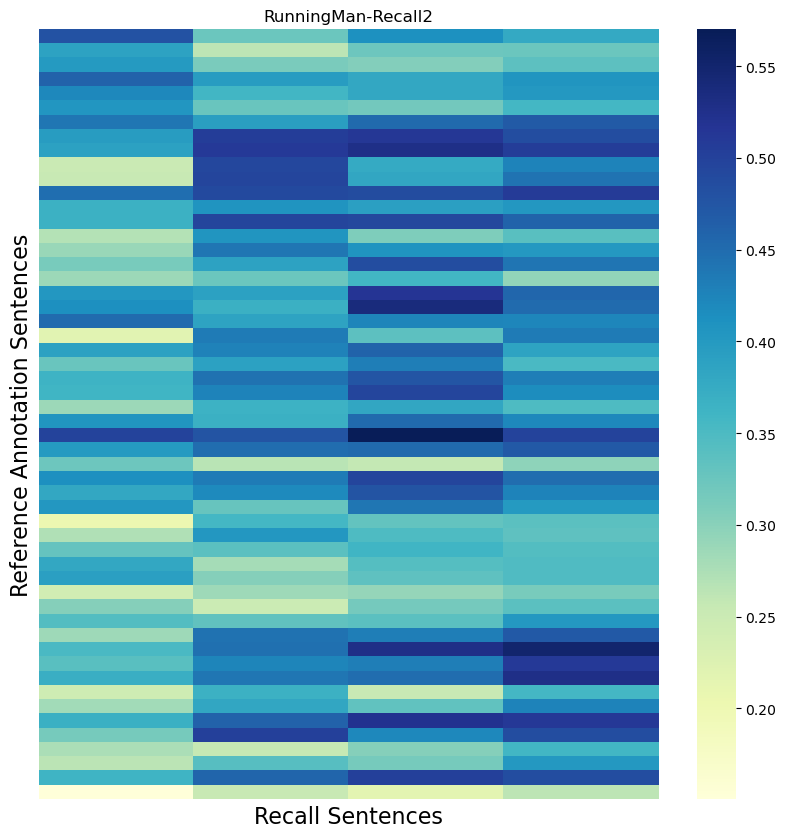

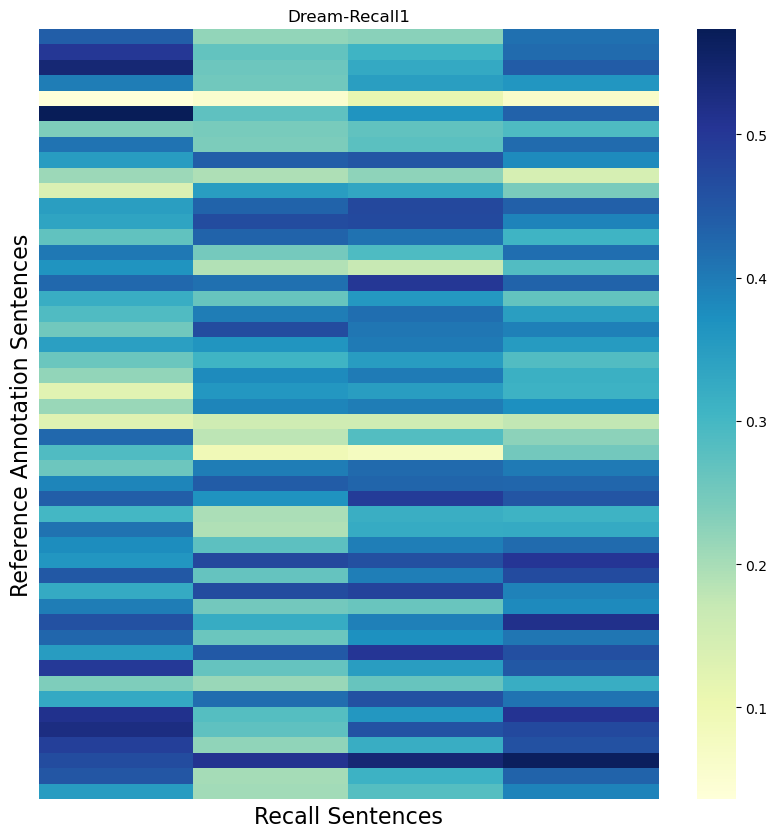

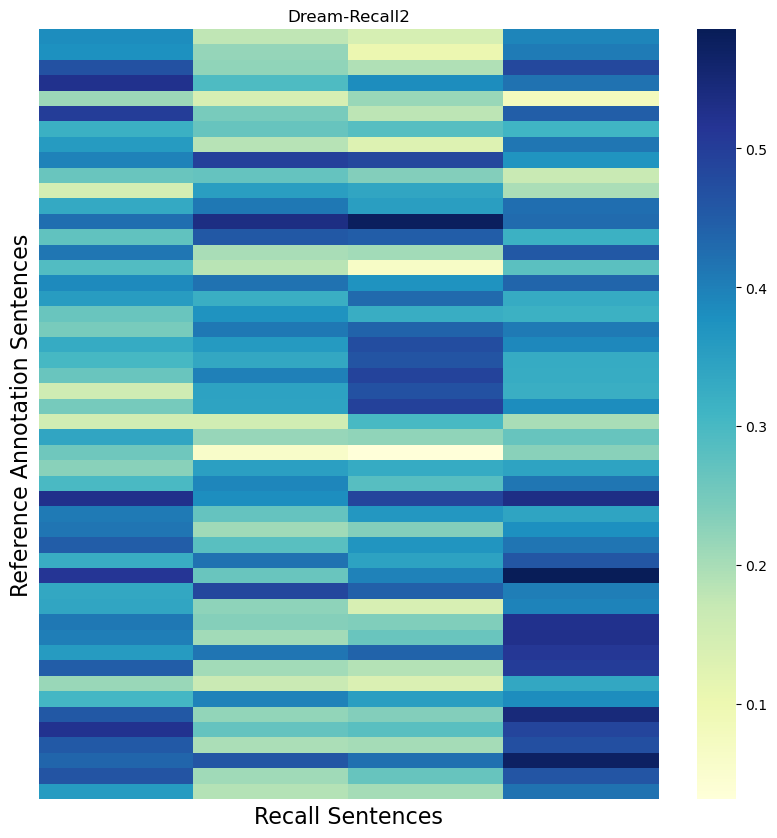

In [86]:
story_df = {} 
for program in programs:
    reall_df = {}
    for recall in ["Recall1", "Recall2"]:
        temp = np.array([matrix_df[key][program][recall] for key in matrix_df.keys()])
        temp_mean = temp.mean(axis = 0)
        
        #plot 
        fig = plt.figure(figsize=(10, 10))
        sns.heatmap(
            temp_mean,
            cmap="YlGnBu",
            xticklabels=False,
            yticklabels=False)
        plt.title(f"{program}-{recall}")
        plt.xlabel("Recall Sentences", fontsize=16)
        plt.ylabel("Reference Annotation Sentences", fontsize=16)
        plt.savefig(f"{plots_dir}/{program}/maen-of-all-{program}-{recall}.png")
        plt.close(fig)
        
        reall_df[recall] = temp_mean
    story_df[program] = reall_df

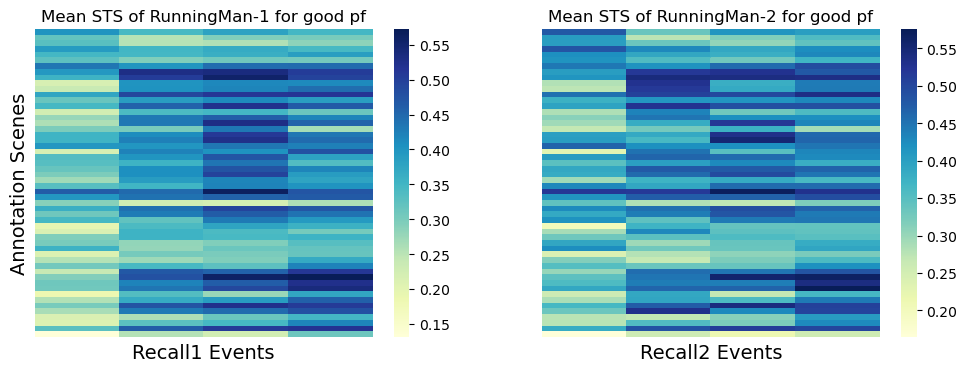

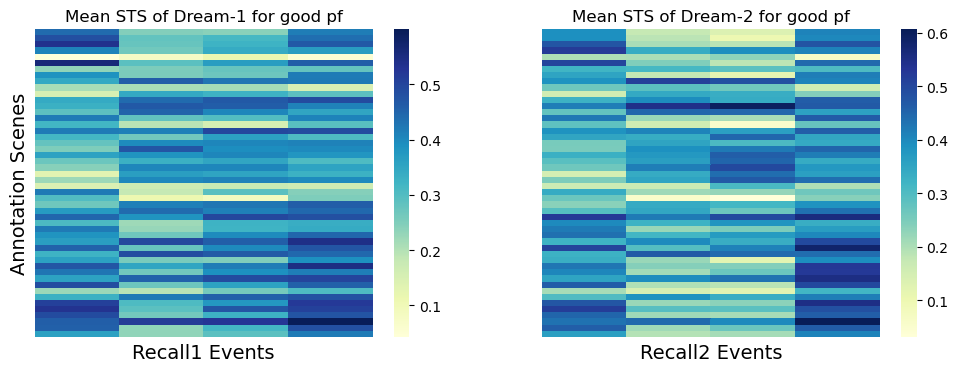

In [98]:
good_df = {} 
for program in programs:
    temp1 = np.array([matrix_df[key][program]["Recall1"] for key in [3,7,11,12, 13, 16,23]])
    temp2 = np.array([matrix_df[key][program]["Recall2"] for key in [3,7,11,12, 13, 16,23]])
    temp1_mean = temp1.mean(axis = 0)
    temp2_mean = temp2.mean(axis = 0)
        
    #plot 
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[10,10]))

    sns.heatmap(temp1_mean, cmap="YlGnBu",ax=axs[0], xticklabels=False, yticklabels=False,)
    sns.heatmap(temp2_mean, cmap="YlGnBu", ax=axs[1],xticklabels=False, yticklabels=False,)

    axs[0].set_title(f"Mean STS of {program}-1 for good pf", fontsize=12)
    axs[1].set_title(f"Mean STS of {program}-2 for good pf", fontsize=12)
    axs[0].set_xlabel("Recall1 Events", fontsize=14)
    axs[1].set_xlabel("Recall2 Events", fontsize=14)
    axs[0].set_ylabel("Annotation Scenes", fontsize=14)

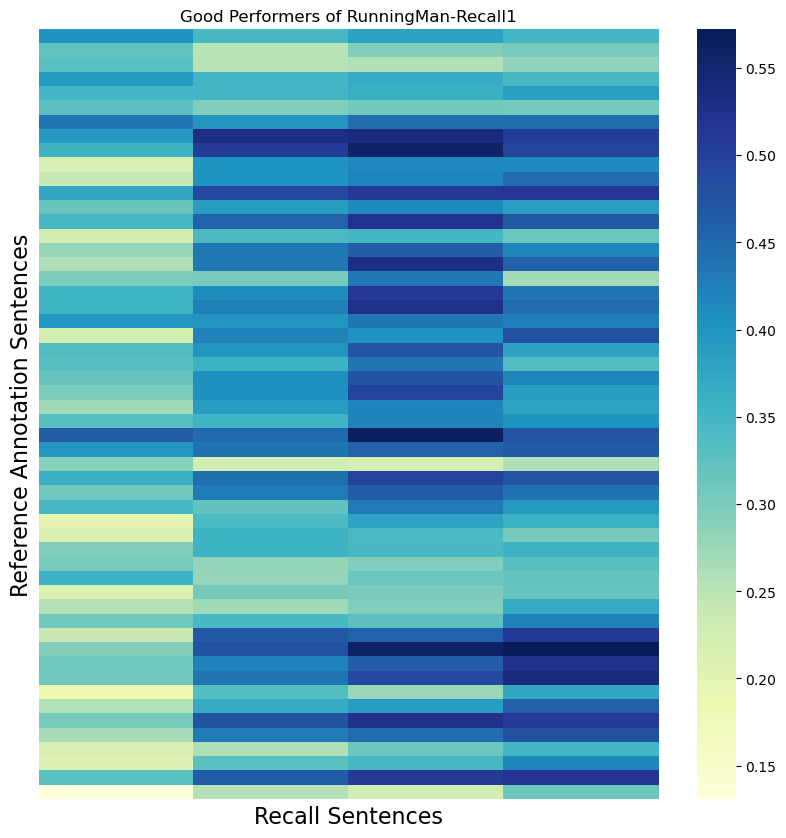

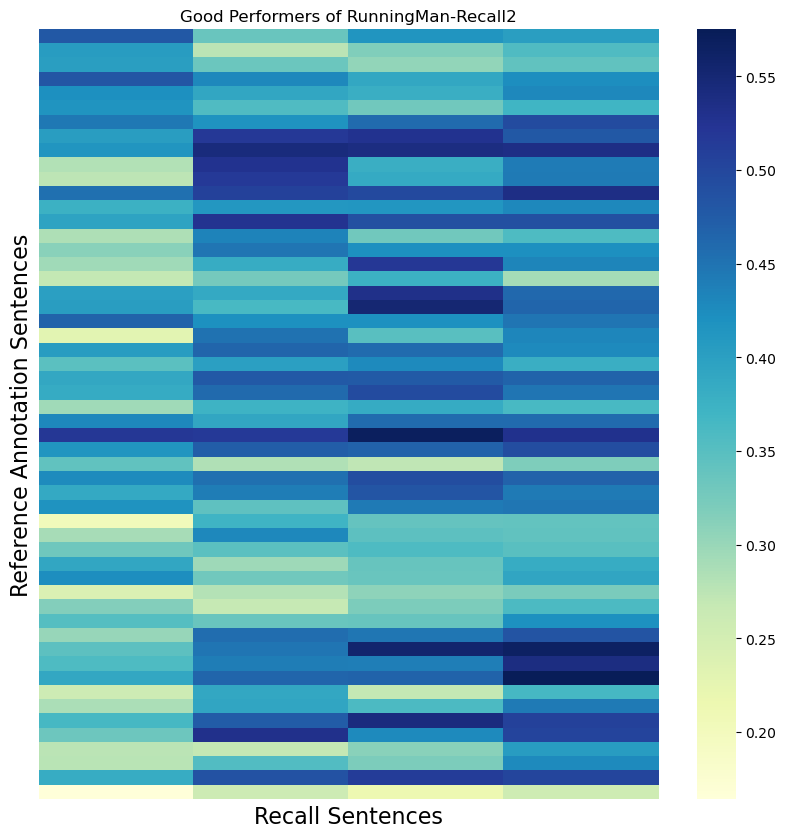

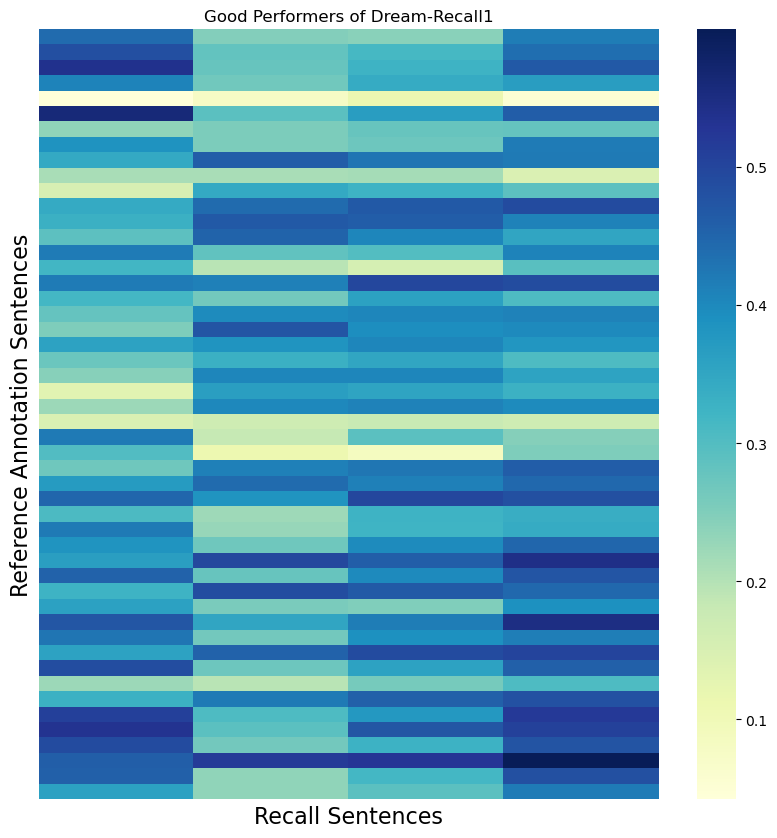

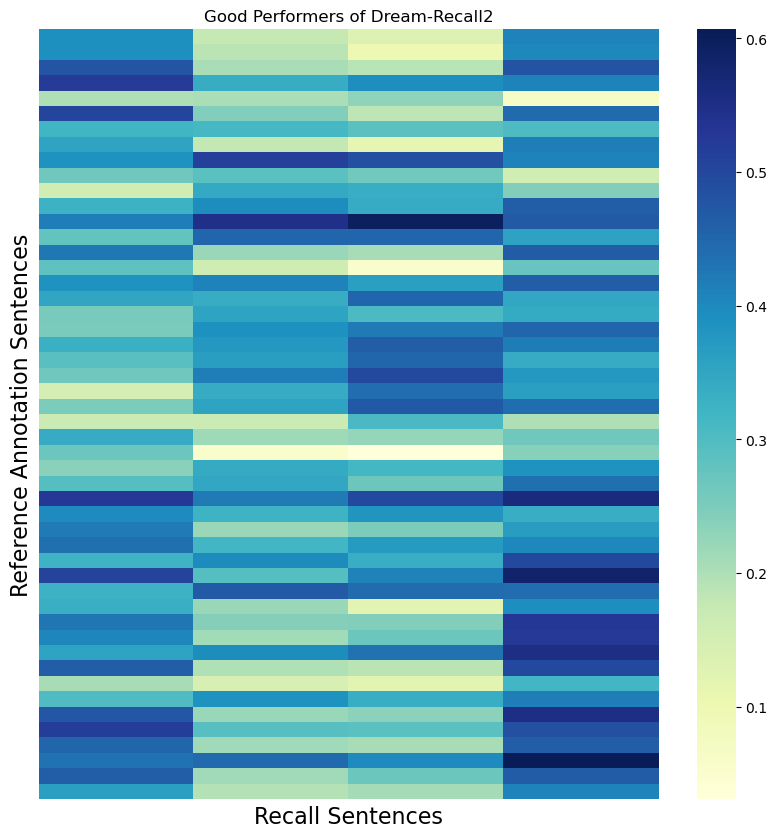

In [85]:
good_df = {} 
for program in programs:
    good_reall_df = {}
    for recall in ["Recall1", "Recall2"]:
        temp = np.array([matrix_df[key][program][recall] for key in [3,7,11,12, 13, 16,23]])
        temp_mean = temp.mean(axis = 0)
        
        #plot 
        fig = plt.figure(figsize=(10, 10))
        sns.heatmap(
            temp_mean,
            cmap="YlGnBu",
            xticklabels=False,
            yticklabels=False,)
        plt.title(f"Good Performers of {program}-{recall}")
        plt.xlabel("Recall Sentences", fontsize=16)
        plt.ylabel("Reference Annotation Sentences", fontsize=16)
        #plt.savefig(f"{plots_dir}/{program}/maen-of-GOOD-{program}-{recall}.png")
        #plt.close(fig)
        good_reall_df[recall] = temp_mean
    good_df[program] = good_reall_df